In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,  cast, Date

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)id

In [10]:
inspector = inspect(engine)

In [11]:
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [14]:
climate = session.query(measurement.prcp, func.date(measurement.date, type_=Date)).filter(measurement.date >= '2012-10-12').\
filter(measurement.date <= '2013-10-11').all()
#climate

In [24]:
date = [result[1] for result in climate]
prcp = [result[0] for result in climate]

Climate_df = pd.DataFrame({"Date": date,"Precipitation": prcp})
Climate_df = Climate_df.set_index("Date")
#Climate_df = Climate_df.set_index("Date", inplace=True)

Climate_df = Climate_df.sort_index()
Climate_df

,Precipitation
Date,
2012-10-12,0.00
2012-10-12,0.01
2012-10-12,0.00
2012-10-12,0.00
2012-10-12,0.00
...,...
2013-10-11,0.00
2013-10-11,0.18
2013-10-11,0.00


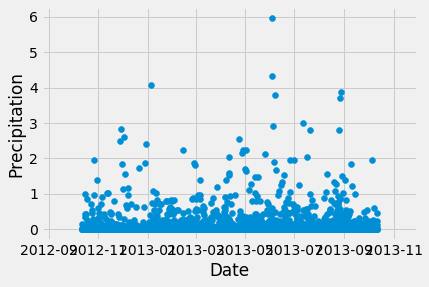

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
#x_values = Climate_df['Date']
y_values = Climate_df['Precipitation']
plt.scatter(x_values,y_values)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()
#plt.savefig('Precipitation.png')

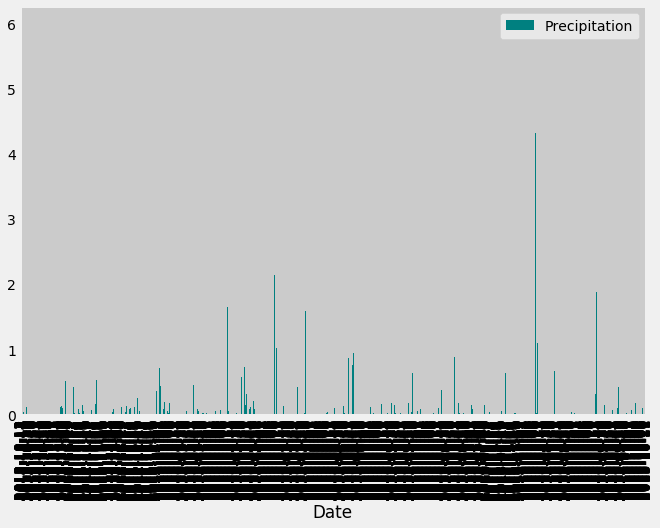

<Figure size 432x288 with 0 Axes>

In [29]:
Climate_df.plot(kind='bar', figsize=(10,7), color = 'teal')
plt.show()
plt.tight_layout()



In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Climate_df.describe()

,Precipitation
count,2453.000000
mean,0.129804
std,0.380146
min,0.000000
25%,0.000000
50%,0.000000
75%,0.080000
max,5.960000


In [32]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station).distinct().count()

9

In [33]:
total_obs = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()
total_obs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
max_obs = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).first()
max_station = [max_obs]
max_station = [result[0] for result in max_station]
max_station

['USC00519281']

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#climate
Station_max = session.query(measurement.prcp, measurement.station, func.date(measurement.date, type_=Date)).\
              filter(measurement.date >= '2012-10-12').\
              filter(measurement.date <= '2013-10-11').\
              filter(measurement.station == 'USC00519281').all()

date = [result[1] for result in climate]
prcp = [result[0] for result in climate]

Station_max_df = pd.DataFrame({"Date": date,"Precipitation": prcp})
Station_max_df

,Date,Precipitation
0,2012-10-12,0.00
1,2012-10-13,0.00
2,2012-10-14,0.00
3,2012-10-15,0.02
4,2012-10-16,0.00
...,...,...
2647,2013-10-07,0.37
2648,2013-10-08,0.09
2649,2013-10-09,0.48
2650,2013-10-10,0.54


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201A9E53588>]],
      dtype=object)

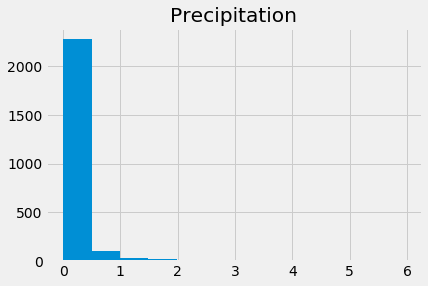

In [40]:
Station_max_df.hist(column='Precipitation', bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
